In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
spam_df = pd.read_csv("emails.csv")

In [25]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [26]:
spam_df.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [27]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [28]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [29]:
## Visualize the Dataset

In [30]:
ham = spam_df[spam_df['spam'] == 0]
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [31]:
spam = spam_df[spam_df['spam'] == 1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [32]:
print('Spam Percentage =',len(spam)/len(spam_df)*100,'%')

Spam Percentage = 23.88268156424581 %


In [33]:
print('Ham percentage =',len(ham)/len(spam_df)*100,'%')

Ham percentage = 76.11731843575419 %


Text(0.5, 0, 'Ham/spam')

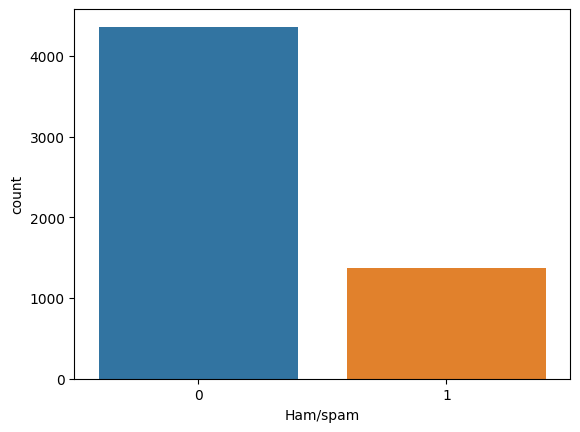

In [94]:
sns.countplot(data=spam_df, x='spam', label="Count")
plt.xlabel('Ham/spam')

In [36]:
## Count Vectorize Example

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']
sample_data

['This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']

In [42]:
sample_vectorizer = CountVectorizer()

In [46]:
X = sample_vectorizer.fit_transform(sample_data)

In [52]:
feature_names = sample_vectorizer.get_feature_names_out()
print(feature_names)

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [53]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
vectorizer = CountVectorizer()
spam_ham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [59]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [63]:
 print(spam_ham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [64]:
spam_ham_countvectorizer.shape

(5728, 37303)

In [65]:
## Training the Model


In [70]:
label = spam_df['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [68]:
from sklearn.naive_bayes import MultinomialNB

In [71]:
NB_classifier = MultinomialNB()
NB_classifier.fit(spam_ham_countvectorizer,label)

MultinomialNB()

In [72]:
testing_sample = ['Free Money!!','Hi, call me when you are back']

In [73]:
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [75]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0], dtype=int64)

In [76]:
## Training the Model

In [78]:
from sklearn.model_selection import train_test_split

X = spam_ham_countvectorizer
y = label
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [79]:
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [80]:
## Evaluating the Model

In [81]:
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
y_predict_train = NB_classifier.predict(X_train)

<Axes: >

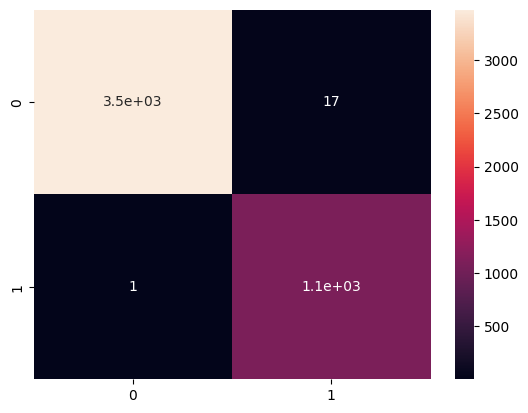

In [84]:
cm = confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm,annot = True)

In [85]:
y_predict_test = NB_classifier.predict(X_test)

<Axes: >

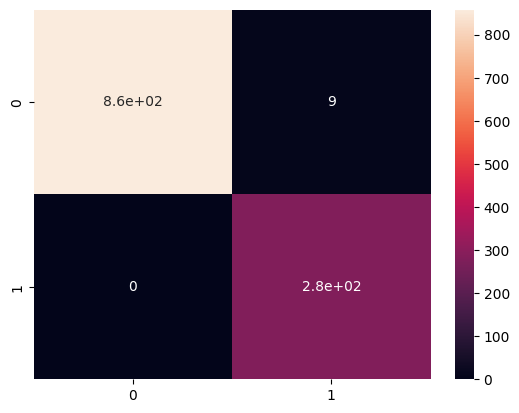

In [86]:
cm1 = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm1,annot = True)

In [87]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       867
           1       0.97      1.00      0.98       279

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

